<a href="https://colab.research.google.com/github/sreejairagavarapu/Research/blob/code-as-of-3%2F13%2F2024/Copy_of_SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

import warnings
warnings.simplefilter(action = 'ignore')

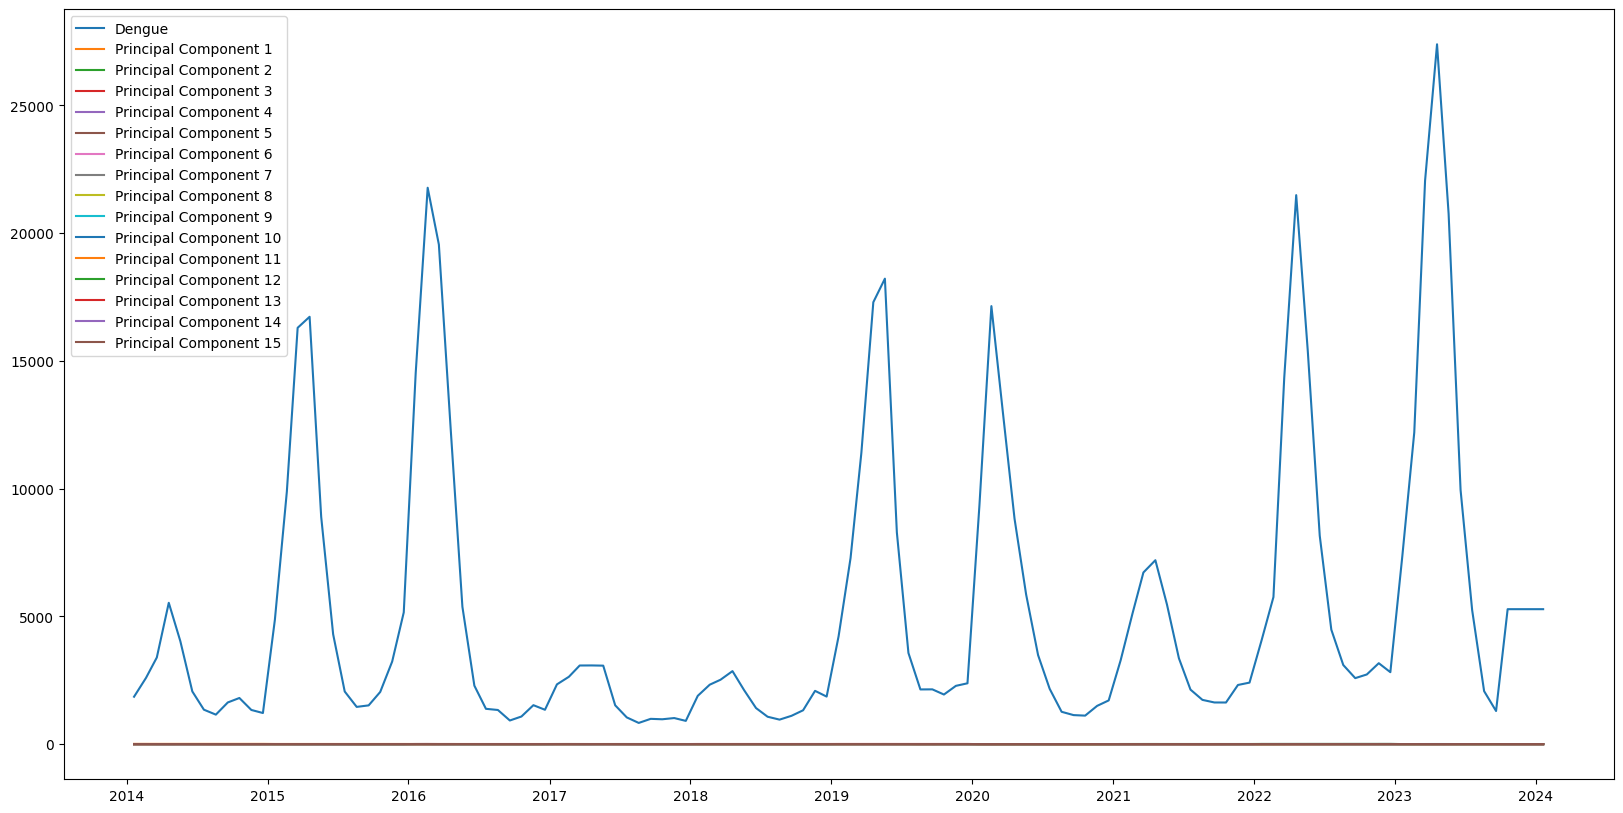

Timestamp('2021-09-20 00:00:00')

In [ ]:
#Read the data and visualize it

df = pd.read_csv('/content/PCAComponentData (1).csv', parse_dates=['DATETIME'])
df = df.fillna(df.mean())


plt.figure(figsize=(20, 10))
plt.plot(df['DATETIME'], df['Dengue'], label='Dengue')
plt.plot(df['DATETIME'], df['Principal Component 1'], label='Principal Component 1')
plt.plot(df['DATETIME'], df['Principal Component 2'], label='Principal Component 2')
plt.plot(df['DATETIME'], df['Principal Component 3'], label='Principal Component 3')
plt.plot(df['DATETIME'], df['Principal Component 4'], label='Principal Component 4')
plt.plot(df['DATETIME'], df['Principal Component 5'], label='Principal Component 5')
plt.plot(df['DATETIME'], df['Principal Component 6'], label='Principal Component 6')
plt.plot(df['DATETIME'], df['Principal Component 7'], label='Principal Component 7')
plt.plot(df['DATETIME'], df['Principal Component 8'], label='Principal Component 8')
plt.plot(df['DATETIME'], df['Principal Component 9'], label='Principal Component 9')
plt.plot(df['DATETIME'], df['Principal Component 10'], label='Principal Component 10')
plt.plot(df['DATETIME'], df['Principal Component 11'], label='Principal Component 11')
plt.plot(df['DATETIME'], df['Principal Component 12'], label='Principal Component 12')
plt.plot(df['DATETIME'], df['Principal Component 13'], label='Principal Component 13')
plt.plot(df['DATETIME'], df['Principal Component 14'], label='Principal Component 14')
plt.plot(df['DATETIME'], df['Principal Component 15'], label='Principal Component 15')
plt.legend()
plt.show()

df.tail(29).iloc[0]['DATETIME']

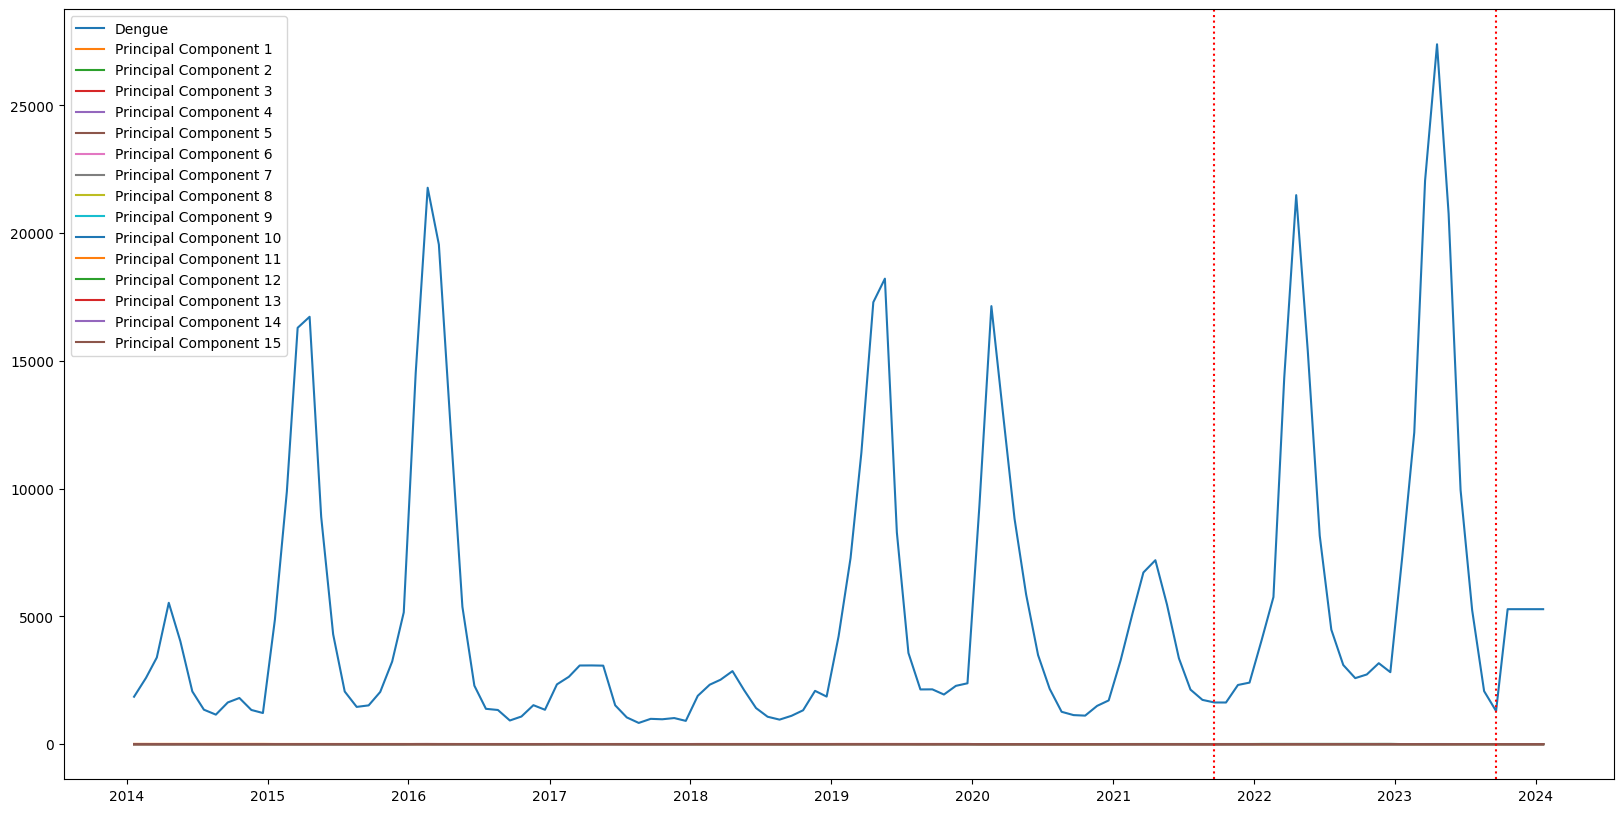

In [ ]:
MAX_TRAINING_DATE = df.tail(29).iloc[0]['DATETIME']
MAX_TESTING_DATE = df.tail(5).iloc[0]['DATETIME']

plt.figure(figsize=(20, 10))
plt.plot(df['DATETIME'], df['Dengue'], label='Dengue')
plt.plot(df['DATETIME'], df['Principal Component 1'], label='Principal Component 1')
plt.plot(df['DATETIME'], df['Principal Component 2'], label='Principal Component 2')
plt.plot(df['DATETIME'], df['Principal Component 3'], label='Principal Component 3')
plt.plot(df['DATETIME'], df['Principal Component 4'], label='Principal Component 4')
plt.plot(df['DATETIME'], df['Principal Component 5'], label='Principal Component 5')
plt.plot(df['DATETIME'], df['Principal Component 6'], label='Principal Component 6')
plt.plot(df['DATETIME'], df['Principal Component 7'], label='Principal Component 7')
plt.plot(df['DATETIME'], df['Principal Component 8'], label='Principal Component 8')
plt.plot(df['DATETIME'], df['Principal Component 9'], label='Principal Component 9')
plt.plot(df['DATETIME'], df['Principal Component 10'], label='Principal Component 10')
plt.plot(df['DATETIME'], df['Principal Component 11'], label='Principal Component 11')
plt.plot(df['DATETIME'], df['Principal Component 12'], label='Principal Component 12')
plt.plot(df['DATETIME'], df['Principal Component 13'], label='Principal Component 13')
plt.plot(df['DATETIME'], df['Principal Component 14'], label='Principal Component 14')
plt.plot(df['DATETIME'], df['Principal Component 15'], label='Principal Component 15')
plt.axvline(MAX_TRAINING_DATE, color = 'red', linestyle = 'dotted')
plt.axvline(MAX_TESTING_DATE, color = 'red', linestyle = 'dotted')
plt.legend()
plt.show()

df_train = df.loc[df['DATETIME'] < MAX_TRAINING_DATE, :]
df_test = df.loc[(df['DATETIME'] >= MAX_TRAINING_DATE) & (df['DATETIME'] <= MAX_TESTING_DATE), :]



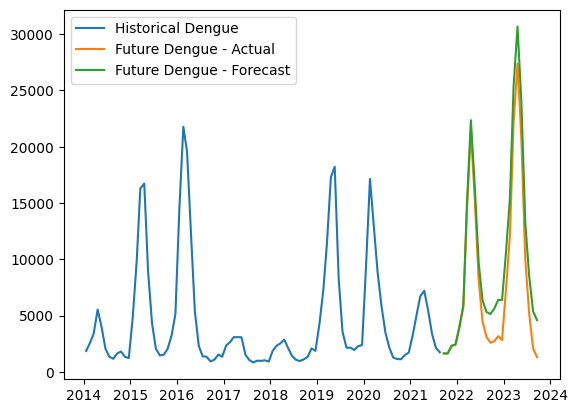

In [ ]:
model = SARIMAX(
    endog = df_train['Dengue'],
    exog = df_train[['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5', 'Principal Component 6', 'Principal Component 7', 'Principal Component 8', 'Principal Component 9', 'Principal Component 10', 'Principal Component 11', 'Principal Component 12', 'Principal Component 13', 'Principal Component 14', 'Principal Component 15']],
    order = (1, 1, 3), # p, d, q order parameters for ARIMA
    trend = [1,0], # A(t) = a0 + a1*t + a2*t^2
    seasonal_order = (1, 0, 0, 12) # P, D, Q seasonal order parameters
).fit()

#model.summary()

forecast = model.forecast(steps = df_test.shape[0], exog = df_test[['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5', 'Principal Component 6', 'Principal Component 7', 'Principal Component 8', 'Principal Component 9', 'Principal Component 10', 'Principal Component 11', 'Principal Component 12', 'Principal Component 13', 'Principal Component 14', 'Principal Component 15']])



plt.figure()
plt.plot(df_train['DATETIME'], df_train['Dengue'], label = 'Historical Dengue')
plt.plot(df_test['DATETIME'], df_test['Dengue'], label = 'Future Dengue - Actual')
plt.plot(df_test['DATETIME'], forecast, label = 'Future Dengue - Forecast')
plt.legend()
plt.show()

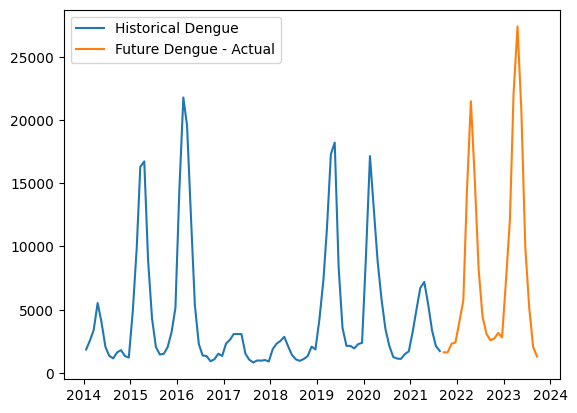

In [ ]:
plt.figure()
plt.plot(df_train['DATETIME'], df_train['Dengue'], label = 'Historical Dengue')
plt.plot(df_test['DATETIME'], df_test['Dengue'], label = 'Future Dengue - Actual')
plt.legend()
plt.show()

In [ ]:
# %% [code]
#Function to 'step' randomly in hyperparameter space

def step(params):
  updated_params = deepcopy(params)
  selected_variable = np.random.choice(['p', 'd', 'q', 'P', 'D', 'Q', 'a0', 'a1'], size = 1)[0]
  current_value = updated_params[selected_variable]

  #Update the current value randomly
  updated_value = current_value + np.random.choice([-1, 1], size = 1)[0]

  #Enforce parameter limits
  if (selected_variable in ['p', 'q']):
    low, high = 0, 6
  else:
    low, high = 0, 1

  updated_value = min([max([low, updated_value]), high])

  updated_params[selected_variable] = updated_value

  return updated_params

# Function to score hyperparameter set

def score(params, data):

  error_scores = []

  for validation_steps in [1, 2, 3, 4, 5]:
    training_set_length = data.shape[0] - validation_steps
    model = SARIMAX(
        endog = data['Dengue'].head(training_set_length),
        exog = data[['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5', 'Principal Component 6', 'Principal Component 7', 'Principal Component 8', 'Principal Component 9', 'Principal Component 10', 'Principal Component 11', 'Principal Component 12', 'Principal Component 13', 'Principal Component 14', 'Principal Component 15']].head(training_set_length),
        order = (params['p'], params['d'], params['q']), # p, d, q order parameters for ARIMA
        trend = [params['a0'], params['a1']], # A(t) = a0 + a1*t + a2*t^2
        seasonal_order = (params['P'], params['D'], params['Q'], 12) # P, D, Q seasonal order parameters
    ).fit()

#model.summary()

    forecast = model.forecast(steps = validation_steps, exog = data[['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5', 'Principal Component 6', 'Principal Component 7', 'Principal Component 8', 'Principal Component 9', 'Principal Component 10', 'Principal Component 11', 'Principal Component 12', 'Principal Component 13', 'Principal Component 14', 'Principal Component 15']].tail(validation_steps))
    actuals = data['Dengue'].tail(validation_steps)

  # compute error metric and return
    error = (forecast.tail(1) - actuals.tail(1)).abs().mean()
    error_scores.append(error)
  return np.mean(error_scores)



#Function to 'step' randomly in hyperparameter space

def step(params):
  updated_params = deepcopy(params)
  selected_variable = np.random.choice(['p', 'd', 'q', 'P', 'D', 'Q', 'a0', 'a1'], size = 1)[0]
  current_value = updated_params[selected_variable]

  #Update the current value randomly
  updated_value = current_value + np.random.choice([-1, 1], size = 1)[0]

  #Enforce parameter limits
  if (selected_variable in ['p', 'q']):
    low, high = 0, 6
  else:
    low, high = 0, 1

  updated_value = min([max([low, updated_value]), high])

  updated_params[selected_variable] = updated_value

  return updated_params

# Function to score hyperparameter set

def score(params, data):

  error_scores = []

  for validation_steps in [1, 2, 3, 4, 5]:
    training_set_length = data.shape[0] - validation_steps
    model = SARIMAX(
        endog = data['Dengue'].head(training_set_length),
        exog = data[['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5', 'Principal Component 6', 'Principal Component 7', 'Principal Component 8', 'Principal Component 9', 'Principal Component 10', 'Principal Component 11', 'Principal Component 12', 'Principal Component 13', 'Principal Component 14', 'Principal Component 15']].head(training_set_length),
        order = (params['p'], params['d'], params['q']), # p, d, q order parameters for ARIMA
        trend = [params['a0'], params['a1']], # A(t) = a0 + a1*t + a2*t^2
        seasonal_order = (params['P'], params['D'], params['Q'], 12) # P, D, Q seasonal order parameters
    ).fit()

#model.summary()

    forecast = model.forecast(steps = validation_steps, exog = data[['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5', 'Principal Component 6', 'Principal Component 7', 'Principal Component 8', 'Principal Component 9', 'Principal Component 10', 'Principal Component 11', 'Principal Component 12', 'Principal Component 13', 'Principal Component 14', 'Principal Component 15']].tail(validation_steps))
    actuals = data['Dengue'].tail(validation_steps)

  # compute error metric and return
    error = (forecast.tail(1) - actuals.tail(1)).abs().mean()
    error_scores.append(error)
  return np.mean(error_scores)


In [ ]:
# Initial guess
x0 = {'p': 1, 'd': 1, 'q': 0, 'P': 0, 'D': 0, 'Q': 0, 'a0': 1, 'a1': 1}
f0 = score(x0, df_train)

# Keep track of best parameters
xbest = deepcopy(x0)
fbest = f0

print('initial parameter score = ', f0)

initial parameter score =  0.0001090356127861014


In [ ]:
optimization_steps = 100

temperature = 0.05

optimization_progress = {'f0': [], 'fbest': []}

for t in range(optimization_steps):

    # Randomly changed x0
    x1 = step(x0)
    f1 = score(x1, df_train)

    # If the new point is lower in score than the previous (meaning better)
    if(f1 < f0):
        x0 = deepcopy(x1)
        f0 = f1
    else: # if new point is worse, accept with some probability
        if(np.random.random() < 2**(-(f1-f0)/temperature)):
            x0 = deepcopy(x1)
            f0 = f1

    # Update the 'best' parameters
    if(f0 < fbest):
        fbest = f0
        xbest = deepcopy(x0)

    # Print out progress
    print('current score = {}, best score = {}'.format(f0, fbest))
    optimization_progress['f0'].append(f0)
    optimization_progress['fbest'].append(fbest)


current score = 0.0001090356127861014, best score = 0.0001090356127861014
current score = 0.0001090356127861014, best score = 0.0001090356127861014
current score = 0.0001090356127861014, best score = 0.0001090356127861014
current score = 0.0001090356127861014, best score = 0.0001090356127861014
current score = 8.794989471425652e-05, best score = 8.794989471425652e-05
current score = 8.794989471425652e-05, best score = 8.794989471425652e-05
current score = 8.925598422138137e-05, best score = 8.794989471425652e-05
current score = 8.925598422138137e-05, best score = 8.794989471425652e-05
current score = 2.8064723755960587e-05, best score = 2.8064723755960587e-05
current score = 8.925598422138137e-05, best score = 2.8064723755960587e-05
current score = 8.925598422138137e-05, best score = 2.8064723755960587e-05
current score = 8.925598422138137e-05, best score = 2.8064723755960587e-05
current score = 0.00010715199568949174, best score = 2.8064723755960587e-05
current score = 0.0001071519956

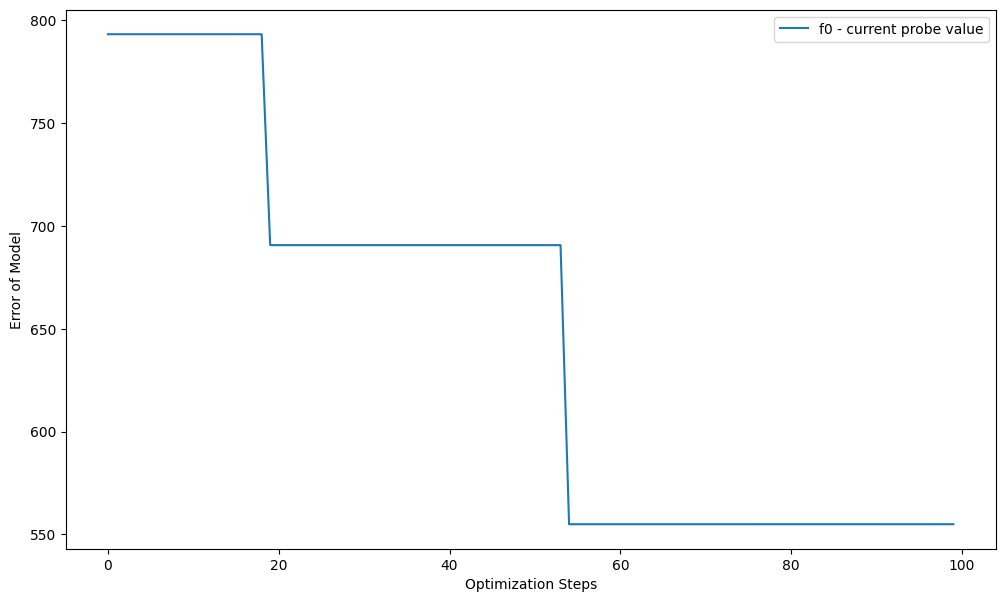

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(optimization_progress['f0'], label = 'f0 - current probe value')
#plt.plot(optimization_progress['fbest'], label = 'fbest - total best parameter')
plt.xlabel('Optimization Steps')
plt.ylabel('Error of Model')
plt.legend()
plt.show()

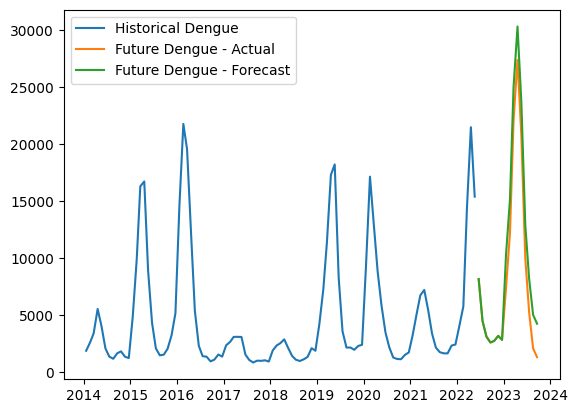

In [ ]:
model = SARIMAX(
    endog = df_train['Dengue'],
    exog = df_train[['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5', 'Principal Component 6', 'Principal Component 7', 'Principal Component 8', 'Principal Component 9', 'Principal Component 10', 'Principal Component 11', 'Principal Component 12', 'Principal Component 13', 'Principal Component 14', 'Principal Component 15']],
    order = (xbest['p'], xbest['d'], xbest['q']), # p, d, q order parameters for arima
    trend = [xbest['a0'], xbest['a1']], # A(t) = a0 + a1*t + a2*t^2 ...
    seasonal_order = (xbest['P'], xbest['D'], xbest['Q'], 12) # P, D, Q seasonal order parameters
).fit()

#model.summary()

forecast = model.forecast(steps = df_test.shape[0], exog = df_test[['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5', 'Principal Component 6', 'Principal Component 7', 'Principal Component 8', 'Principal Component 9', 'Principal Component 10', 'Principal Component 11', 'Principal Component 12', 'Principal Component 13', 'Principal Component 14', 'Principal Component 15']])

plt.figure()
plt.plot(df_train['DATETIME'], df_train['Dengue'], label = 'Historical Dengue')
plt.plot(df_test['DATETIME'], df_test['Dengue'], label = 'Future Dengue - Actual')
plt.plot(df_test['DATETIME'], forecast, label = 'Future Dengue - Forecast')
plt.legend()
plt.show()

